C:\Users\henrique.lyrio\AppData\Local\Temp\ipykernel_13552\2584029230.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)
C:\Users\henrique.lyrio\AppData\Local\Temp\ipykernel_13552\2584029230.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

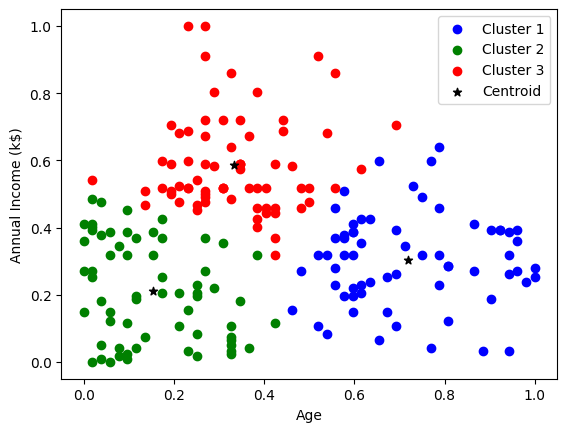

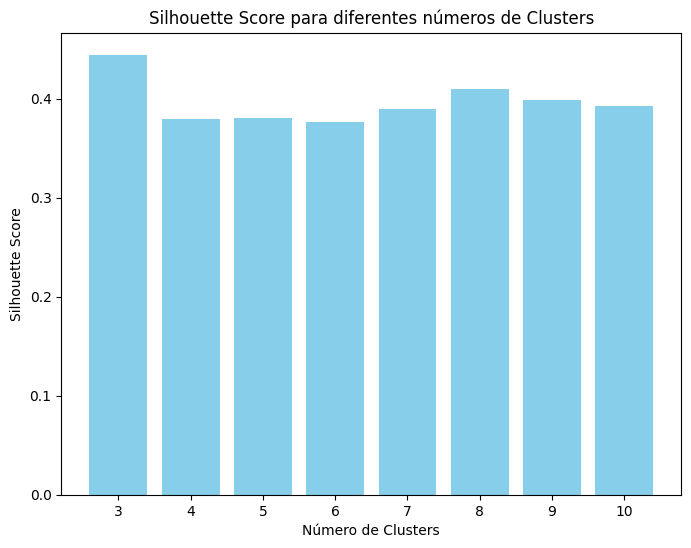

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score

df = pd.read_csv("Mall_Customers.csv")
data = df.head(200) 

# Tratamento de Dados
# Substituir valores negativos em 'Age' e 'Annual Income (k$)' pela média, se existirem
media_age = data['Age'][data['Age'] >= 0].mean()
data['Age'] = data['Age'].apply(lambda x: media_age if x < 0 else x)
data['Age'].fillna(data['Age'].mean(), inplace=True)

media_income = data['Annual Income (k$)'][data['Annual Income (k$)'] >= 0].mean()
data['Annual Income (k$)'] = data['Annual Income (k$)'].apply(lambda x: media_income if x < 0 else x)
data['Annual Income (k$)'].fillna(data['Annual Income (k$)'].mean(), inplace=True)

# Escalonamento dos dados para o intervalo de 0 a 1
scaler = MinMaxScaler()
data['Annual Income (k$)'] = scaler.fit_transform(data[['Annual Income (k$)']])
data['Age'] = scaler.fit_transform(data[['Age']])

# Treinamento do Modelo
km = KMeans(n_clusters=3)  # Instanciação do K-means com 3 clusters
km_predict = km.fit_predict(data[['Age', 'Annual Income (k$)']])
data['cluster'] = km_predict  # Nova coluna para os clusters

# Visualização dos clusters
plt.scatter(data['Age'][data['cluster'] == 0], data['Annual Income (k$)'][data['cluster'] == 0], color='blue', label='Cluster 1')
plt.scatter(data['Age'][data['cluster'] == 1], data['Annual Income (k$)'][data['cluster'] == 1], color='green', label='Cluster 2')
plt.scatter(data['Age'][data['cluster'] == 2], data['Annual Income (k$)'][data['cluster'] == 2], color='red', label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='black', marker='*', label='Centroid')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

# Função para calcular e plotar Silhouette Scores
def plot_silhouette_scores(data):
    silhouette_scores = []
    cluster_range = range(3, 11)  # Clusters de 3 a 10

    for n_clusters in cluster_range:
        km = KMeans(n_clusters=n_clusters)
        y_predict = km.fit_predict(data[['Age', 'Annual Income (k$)']])

        # Calcula o Silhouette Score para o modelo atual
        score = silhouette_score(data[['Age', 'Annual Income (k$)']], y_predict)
        silhouette_scores.append(score)

    # Gráfico de barras
    plt.figure(figsize=(8, 6))
    plt.bar(cluster_range, silhouette_scores, color='skyblue')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score para diferentes números de Clusters')
    plt.xticks(cluster_range)
    plt.show()

# Chamando a função para visualizar os Silhouette Scores
plot_silhouette_scores(data)